# It s a Retail Dataset. 
## Here the Total Instances are 3.73laks, Total Features are 6. 
### The Features are like OrderID that is the individual order number for every product, Prodct that is name of every products, Quantity Ordered that is what is the number of product has been ordered, Price each that is price of every single product, Order Date that is th pericular date and time when the product has been ordered, Purchase Address that is the address of the cstomer where he/she has ordered the perticular product.

In [212]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
from fancyimpute import KNN

In [213]:
#import data
df = pd.read_excel("C:/Users/test/Downloads/all_data_copy.xlsx")

# Feature Information:
## Order ID: Order identification number for each product
## Product: Product name
## Quantity Ordered: Amount of items
## Price Each: Price of each product per item in dollars
## Order Date: Date of purchase
## Purchase Address: Address of purchase order

In [214]:
#First 5 rows of data
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [215]:
#Last 5 rows of data
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354.0,iPhone,1.0,700.0,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355.0,iPhone,1.0,700.0,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


| Feature | Category |                              
|:---------|----------:|
| Order ID | Ordinal |
| Product | Nominal |
| Quantity Ordered | Discrete |
| Price Each | Continuous |
| Order Date | Date and time |
| purchase Address | Nominal |

In [216]:
#Shape of data
df.shape

(373700, 6)

### This dataset has 373700 rows and 6 Features..

In [217]:
#Duplicate data in Order ID
df['Order ID'].duplicated().sum()

195261

In [218]:
#Null values in data
df.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [219]:
#Drop null values
df.dropna(inplace=True)

In [220]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


In [221]:
#all unique values in Quantity Ordered
print(df['Quantity Ordered'].unique())
print(df['Product'].unique())
print(df['Order ID'].unique())
print(df['Price Each'].unique())
print(df['Order Date'].unique())
print(df['Purchase Address'].unique())

[1.0 2.0 3.0 5.0 4.0 7.0 'Quantity Ordered' 6.0 9.0 8.0]
['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' 'Product']
[141234.0 141235.0 141236.0 ... 319668.0 319669.0 319670.0]
[700.0 14.95 11.99 149.99 2.99 389.99 11.95 99.99 150.0 1700.0 300.0 400.0
 3.84 600.0 109.99 379.99 999.99 'Price Each']
[datetime.datetime(2019, 1, 22, 21, 25)
 datetime.datetime(2019, 1, 28, 14, 15)
 datetime.datetime(2019, 1, 17, 13, 33) ...
 datetime.datetime(2019, 12, 1, 12, 1)
 datetime.datetime(2019, 12, 9, 6, 43)
 datetime.datetime(2019, 12, 3, 10, 39)]
['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Adams St, San Francisco, CA 94016' ..

In [222]:
#row where value is Quantity in Quantity Ordered
df[df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
372014,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
372401,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373413,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373482,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [223]:
#Drop rows where value is Quantity in Quantity Ordered
df.drop(df[df['Quantity Ordered'] == 'Quantity Ordered'].index, inplace=True)

In [224]:
print(df['Quantity Ordered'].nunique())
print(df['Product'].nunique())
print(df['Order ID'].nunique())
print(df['Price Each'].nunique())
print(df['Order Date'].nunique())
print(df['Purchase Address'].nunique())

9
19
178437
17
142395
140787


In [225]:
#shape of data
df.shape

(371900, 6)

In [226]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          371900 non-null  object
 1   Product           371900 non-null  object
 2   Quantity Ordered  371900 non-null  object
 3   Price Each        371900 non-null  object
 4   Order Date        371900 non-null  object
 5   Purchase Address  371900 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


In [227]:
#convert Quantity Ordered to int
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [228]:
#Convert order ID to categoorical
df['Order ID'] = df['Order ID'].astype('category')

In [229]:
#Convert Price Each to float
df['Price Each'] = df['Price Each'].astype(float)

In [230]:
#convert date time to str
df['Order Date'] = df['Order Date'].astype(str)

In [231]:
#Head
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [232]:
#Sort by Order Date
df.sort_values(by='Order Date', inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
260741,147268.0,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
6344,147268.0,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
261551,148041.0,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
7154,148041.0,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
8507,149343.0,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"


In [233]:
#Duplicate values
df.duplicated().sum()

186214

In [234]:
#Drop duplicate values
df.drop_duplicates(inplace=True)

In [235]:
#Data Shape
df.shape

(185686, 6)

In [236]:
#Head
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
260741,147268.0,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
261551,148041.0,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
8507,149343.0,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
263558,149964.0,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
262911,149350.0,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"


In [237]:
#Split Purchase Address into two columns
df['Date'] = df['Order Date'].str.split(' ', expand=True)[0]
df['Time'] = df['Order Date'].str.split(' ', expand=True)[1]
#Drop Order Date
df.drop(['Order Date'], axis=1, inplace=True)

In [238]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time
260741,147268.0,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",2019-01-01,03:07:00
261551,148041.0,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",2019-01-01,03:40:00
8507,149343.0,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",2019-01-01,04:56:00
263558,149964.0,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",2019-01-01,05:53:00
262911,149350.0,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",2019-01-01,06:03:00


In [239]:
#CONVERT DATE TO DATE TIME
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])


In [240]:
#New column as Quantity Ordered * Price Each as sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [241]:
#IQR of Price Each
Q1 = df['Price Each'].quantile(0.25)
Q3 = df['Price Each'].quantile(0.75)
IQR = Q3 - Q1

In [242]:
#Outliers
df[(df['Price Each'] < (Q1 - 3 * IQR)) | (df['Price Each'] > (Q3 + 3 * IQR))]

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Sales
254906,141732.0,iPhone,1,700.00,"446 Pine St, Atlanta, GA 30301",2019-01-01,2022-01-25 06:13:00,700.00
3763,144804.0,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",2019-01-01,2022-01-25 07:29:00,700.00
4259,145270.0,Google Phone,1,600.00,"392 4th St, Dallas, TX 75001",2019-01-01,2022-01-25 07:33:00,600.00
259286,145878.0,Macbook Pro Laptop,1,1700.00,"456 5th St, Los Angeles, CA 90001",2019-01-01,2022-01-25 07:48:00,1700.00
3965,144994.0,ThinkPad Laptop,1,999.99,"903 Willow St, Los Angeles, CA 90001",2019-01-01,2022-01-25 08:13:00,999.99
...,...,...,...,...,...,...,...,...
163998,297817.0,iPhone,1,700.00,"519 13th St, New York City, NY 10001",2020-01-01,2022-01-25 00:22:00,700.00
164158,297969.0,Google Phone,1,600.00,"542 2nd St, San Francisco, CA 94016",2020-01-01,2022-01-25 00:54:00,600.00
228764,306655.0,ThinkPad Laptop,1,999.99,"431 Hickory St, Los Angeles, CA 90001",2020-01-01,2022-01-25 01:46:00,999.99
173419,306809.0,Macbook Pro Laptop,1,1700.00,"326 14th St, Dallas, TX 75001",2020-01-01,2022-01-25 02:20:00,1700.00


In [243]:
Q1 = df['Quantity Ordered'].quantile(0.25)
Q3 = df['Quantity Ordered'].quantile(0.75)
IQR = Q3 - Q1

In [244]:
df[(df['Quantity Ordered'] < (Q1 - 3 * IQR)) | (df['Quantity Ordered'] > (Q3 + 3 * IQR))].sort_values(by='Quantity Ordered',ascending = False)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Sales
90001,227096.0,AAA Batteries (4-pack),9,2.99,"60 10th St, San Francisco, CA 94016",2019-07-29,2022-01-25 09:50:00,26.91
267860,226483.0,AAA Batteries (4-pack),9,2.99,"867 Sunset St, San Francisco, CA 94016",2019-07-20,2022-01-25 23:28:00,26.91
73239,211097.0,AAA Batteries (4-pack),9,2.99,"338 Hickory St, Los Angeles, CA 90001",2019-06-23,2022-01-25 08:29:00,26.91
101176,237807.0,AAA Batteries (4-pack),8,2.99,"89 Church St, Portland, OR 97035",2019-08-13,2022-01-25 11:11:00,23.92
343820,261442.0,AAA Batteries (4-pack),8,2.99,"36 Center St, Boston, MA 02215",2019-10-16,2022-01-25 20:31:00,23.92
...,...,...,...,...,...,...,...,...
310122,196733.0,AAA Batteries (4-pack),2,2.99,"792 River St, New York City, NY 10001",2019-05-30,2022-01-25 10:20:00,5.98
314601,200991.0,AAA Batteries (4-pack),2,2.99,"284 Elm St, Austin, TX 73301",2019-05-30,2022-01-25 10:21:00,5.98
62271,200646.0,USB-C Charging Cable,2,11.95,"856 West St, San Francisco, CA 94016",2019-05-30,2022-01-25 10:39:00,23.90
60437,198908.0,AAA Batteries (4-pack),2,2.99,"202 South St, San Francisco, CA 94016",2019-05-30,2022-01-25 10:41:00,5.98


In [245]:
#skewness of data
df.skew()

C:\Users\test\AppData\Local\Temp/ipykernel_28156/2936168876.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Quantity Ordered    4.829811
Price Each          2.870605
Sales               2.880376
dtype: float64

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


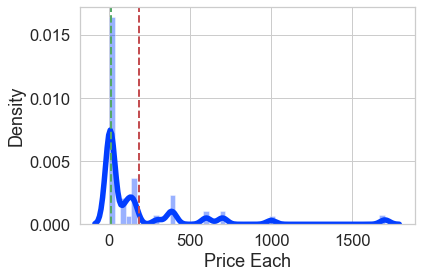

In [246]:
#Distribution of Price Each
sns.distplot(df['Price Each'])
plt.axvline(df['Price Each'].mean(), color='r', linestyle='--',linewidth=2)
plt.axvline(df['Price Each'].median(), color='g', linestyle='--',linewidth=2)

In [247]:
#Box cox transformation of Price Each
df['Price Each'] = stats.boxcox(df['Price Each'])[0]

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


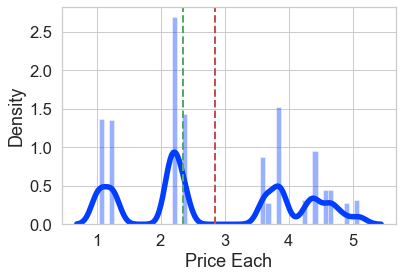

In [248]:
sns.distplot(df['Price Each'])
plt.axvline(df['Price Each'].mean(), color='r', linestyle='--',linewidth=2)
plt.axvline(df['Price Each'].median(), color='g', linestyle='--',linewidth=2)

In [249]:
#Log transformation of Quantity Ordered
df['Quantity Ordered'] = np.sqrt(df['Quantity Ordered'])

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


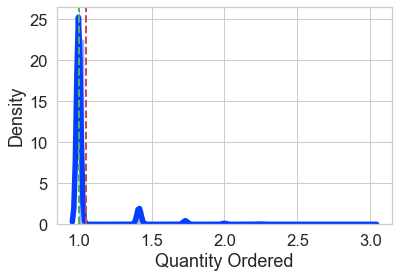

In [250]:
#Distribution of Quantity Ordered
sns.distplot(df['Quantity Ordered'])
plt.axvline(df['Quantity Ordered'].mean(), color='r', linestyle='--',linewidth=2)
plt.axvline(df['Quantity Ordered'].median(), color='g', linestyle='--',linewidth=2)

In [251]:
#Box Cox transformation of Sales
df['Sales'] = stats.boxcox(df['Sales'])[0]

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


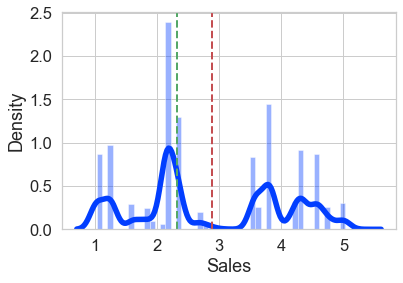

In [252]:
#Distribution of Sales
sns.distplot(df['Sales'])
plt.axvline(df['Sales'].mean(), color='r', linestyle='--',linewidth=2)
plt.axvline(df['Sales'].median(), color='g', linestyle='--',linewidth=2)

<AxesSubplot:ylabel='Price Each'>

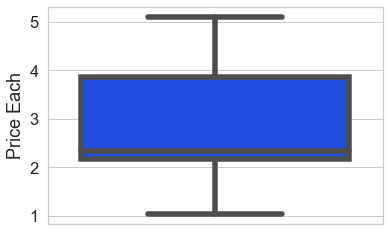

In [253]:
#Box plot of Price Each
sns.boxplot( y='Price Each', data=df)

In [254]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Date,Time,Sales
260741,147268.0,Wired Headphones,1.000000,2.177597,"9 Lake St, New York City, NY 10001",2019-01-01,2022-01-25 03:07:00,2.161565
261551,148041.0,USB-C Charging Cable,1.000000,2.175044,"760 Church St, San Francisco, CA 94016",2019-01-01,2022-01-25 03:40:00,2.159051
8507,149343.0,Apple Airpods Headphones,1.000000,3.865661,"735 5th St, New York City, NY 10001",2019-01-01,2022-01-25 04:56:00,3.811240
263558,149964.0,AAA Batteries (4-pack),1.000000,1.032724,"75 Jackson St, Dallas, TX 75001",2019-01-01,2022-01-25 05:53:00,1.029274
262911,149350.0,USB-C Charging Cable,1.414214,2.175044,"943 2nd St, Atlanta, GA 30301",2019-01-01,2022-01-25 06:03:00,2.660372


In [255]:
#Split DATE into Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
#Drop Date
df.drop(['Date'], axis=1, inplace=True)

In [256]:
#Split Time into Hour, Minute, Second
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
#Drop Time
df.drop(['Time'], axis=1, inplace=True)

In [257]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour,Minute
260741,147268.0,Wired Headphones,1.000000,2.177597,"9 Lake St, New York City, NY 10001",2.161565,2019,1,1,3,7
261551,148041.0,USB-C Charging Cable,1.000000,2.175044,"760 Church St, San Francisco, CA 94016",2.159051,2019,1,1,3,40
8507,149343.0,Apple Airpods Headphones,1.000000,3.865661,"735 5th St, New York City, NY 10001",3.811240,2019,1,1,4,56
263558,149964.0,AAA Batteries (4-pack),1.000000,1.032724,"75 Jackson St, Dallas, TX 75001",1.029274,2019,1,1,5,53
262911,149350.0,USB-C Charging Cable,1.414214,2.175044,"943 2nd St, Atlanta, GA 30301",2.660372,2019,1,1,6,3


### Now my Data cleaning part is over. Initially there are the data types are wrong in the Quantity Ordered , Price Each , Order Date and I changed them w.r.t their perticular right data types.

### Then I see the null values are equally in every feature that is 1090 , so I drop them all..

### Then I findout there are some rows where the values are equals to feature name and I dropped them..

### Then I created a new column with Sales where the values are multiple of Price each and order quantity..

### Then I split the order Date into Year, Month, Day, Hours, Minitues, Seconds for better understanding..

### Then I found out the outliers In ordered Quantity and Price each , but I could not drop the outliers because I dropped them then I will loss some important information about perticular products..

### Then I transform skewed data to normally distributed using Box cox and Square root transformation. But still Quantity Ordered is hihly skewed after square root transformation..
### I could not use log and box cox transformation on Quantity Ordered because That has values in unit and after transformation those can become 0 which I can not use further.

In [258]:
# Split Purchase Address into city 
df['City'] = df['Purchase Address'].str.split(',', expand=True)[1]

In [259]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour,Minute,City
260741,147268.0,Wired Headphones,1.000000,2.177597,"9 Lake St, New York City, NY 10001",2.161565,2019,1,1,3,7,New York City
261551,148041.0,USB-C Charging Cable,1.000000,2.175044,"760 Church St, San Francisco, CA 94016",2.159051,2019,1,1,3,40,San Francisco
8507,149343.0,Apple Airpods Headphones,1.000000,3.865661,"735 5th St, New York City, NY 10001",3.811240,2019,1,1,4,56,New York City
263558,149964.0,AAA Batteries (4-pack),1.000000,1.032724,"75 Jackson St, Dallas, TX 75001",1.029274,2019,1,1,5,53,Dallas
262911,149350.0,USB-C Charging Cable,1.414214,2.175044,"943 2nd St, Atlanta, GA 30301",2.660372,2019,1,1,6,3,Atlanta


<AxesSubplot:xlabel='Month', ylabel='Sales'>

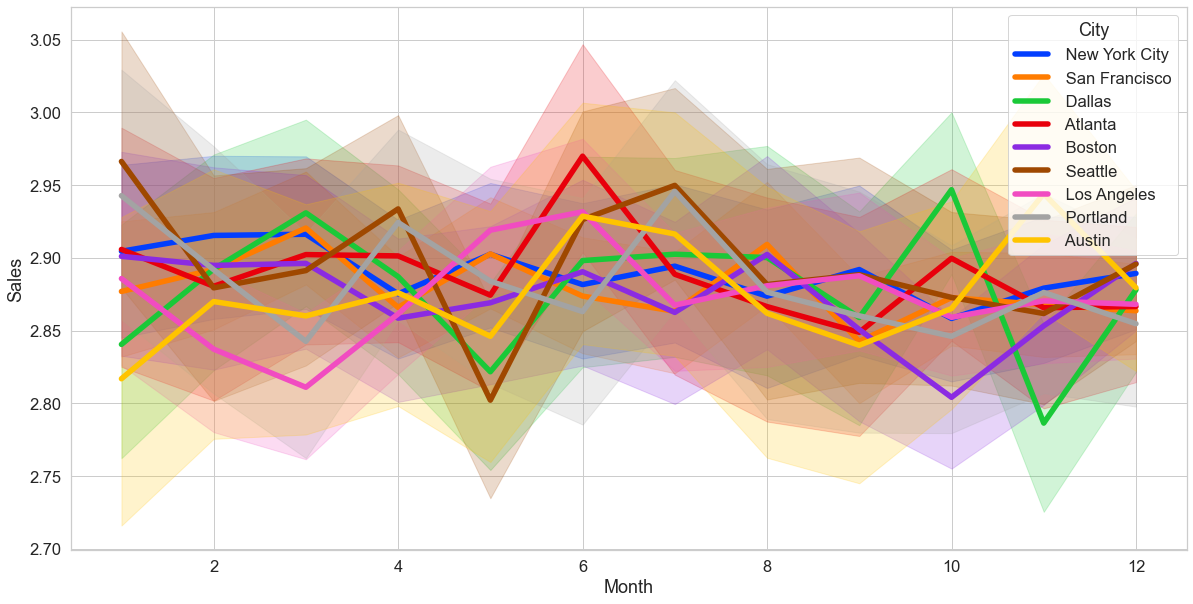

In [260]:
# Distribution of sales  by different months for each city
plt.figure(figsize=(20,10))
sns.lineplot(x='Month', y='Sales', data=df, hue='City')

In [261]:
#Group by City and count the total sales
df1 = df.groupby('City').sum().sort_values(by='Sales', ascending=False)

<AxesSubplot:xlabel='City'>

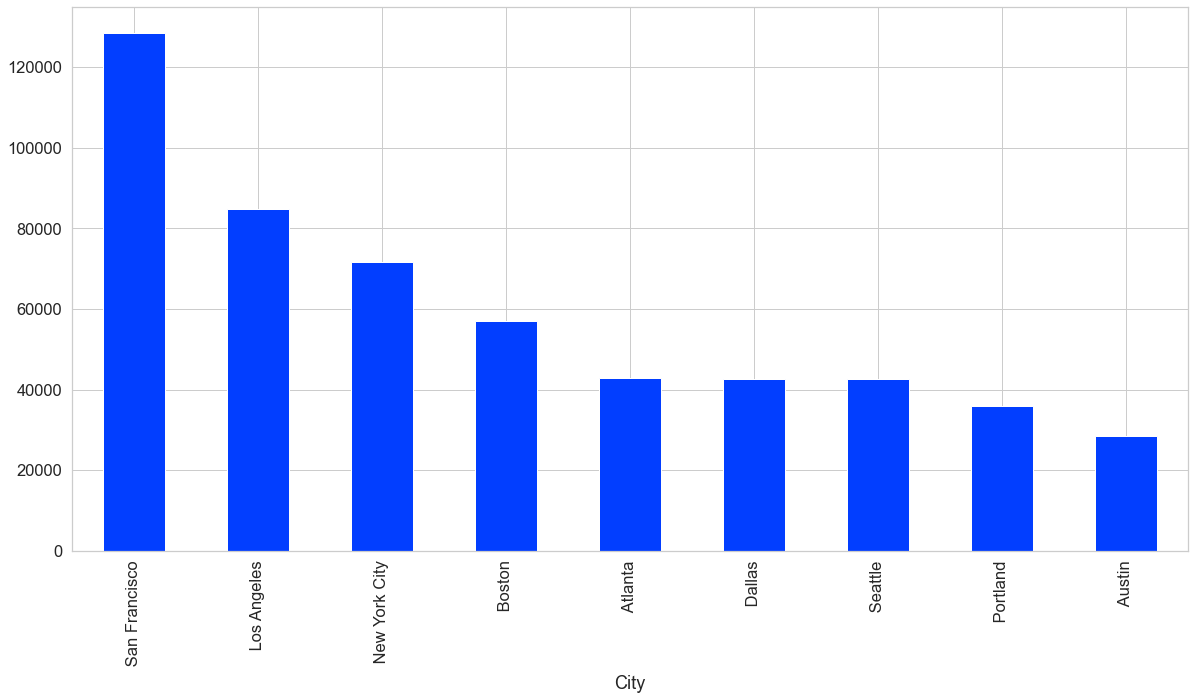

In [262]:
#Plot the total sales
df1['Sales'].plot(kind='bar', figsize=(20,10))

### We can see completely San Francisco has the highest sales..

In [263]:
#group by Month and count the total sales
df2 = df.groupby('Month').sum().sort_values(by='Sales', ascending=False)

<AxesSubplot:xlabel='Month'>

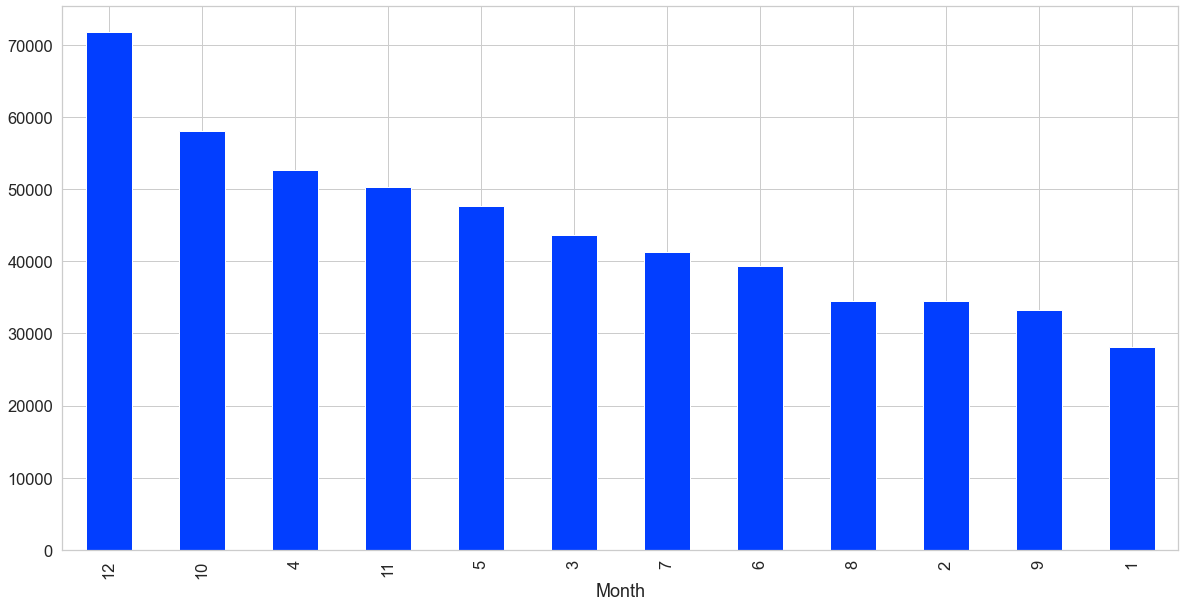

In [264]:
#Plot the total sales
df2['Sales'].plot(kind='bar', figsize=(20,10))

### Here we can see December month has the highest sales..

In [265]:
#group by product and count the order quantity
df3 = df.groupby('Product').sum().sort_values(by='Quantity Ordered', ascending=False)

<AxesSubplot:xlabel='Product'>

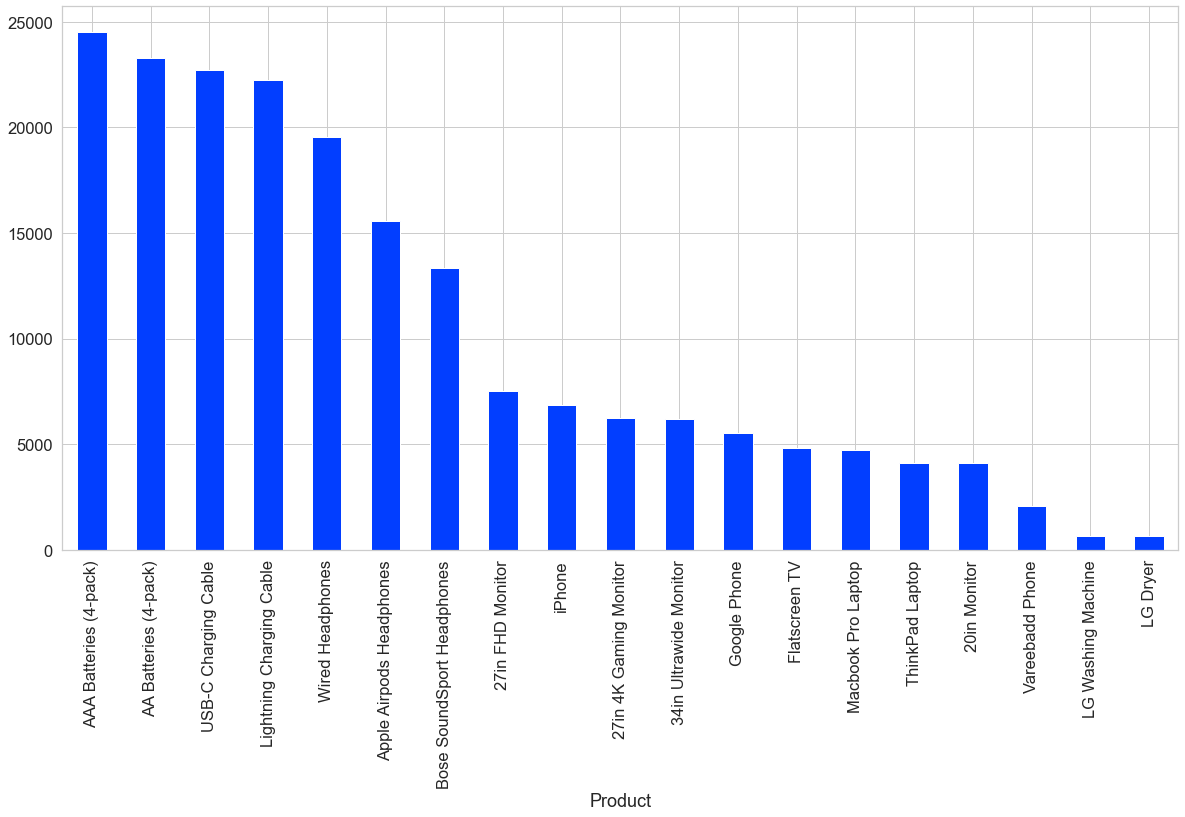

In [266]:
#Plot the quantity ordered
df3['Quantity Ordered'].plot(kind='bar', figsize=(20,10))

In [267]:
#Maximum Ordered Quantity in city
df.groupby('City').sum().sort_values(by='Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each,Sales,Year,Month,Day,Hour,Minute
City,,,,,,,,
San Francisco,46783.790163,127478.579200,128544.424653,90172590,314949,701517,642269,1317094
Los Angeles,30985.412766,84173.115749,84909.539129,59689717,208020,468969,426924,865442
New York City,26027.061445,71184.209871,71771.900332,50166103,175557,392223,357214,733011
Boston,20899.754547,56581.210983,57127.832493,40180123,140898,311856,287705,589414
Dallas,15532.179044,42215.647808,42607.397299,29875145,104447,234019,214078,434330
Atlanta,15529.167809,42627.724542,42931.438584,30008397,104649,234571,214003,442412
Seattle,15417.979466,42201.496738,42560.353168,29705548,104817,229223,213005,435899
Portland,13061.392877,35533.551407,35859.651307,25134533,87636,197290,179394,367847
Austin,10372.900495,28202.244673,28458.206521,19967912,69720,156495,141688,288674


In [268]:
#Group by City and Products 
df4 = df.groupby(['City','Product']).sum().sort_values(by='Quantity Ordered', ascending=False)
df4

Quantity Ordered    Price Each  \
City           Product                                                    
 San Francisco AAA Batteries (4-pack)         5853.578683   5089.264913   
               USB-C Charging Cable           5570.693471  11651.709306   
               AA Batteries (4-pack)          5532.850606   6130.621551   
               Lightning Charging Cable       5312.413488  12088.669407   
               Wired Headphones               4733.585790   9977.748128   
...                                                   ...           ...   
 Dallas        LG Washing Machine               51.000000    235.271847   
               LG Dryer                         44.000000    202.979633   
 Portland      LG Dryer                         37.000000    170.687419   
               LG Washing Machine               37.000000    170.687419   
 Austin        LG Washing Machine               26.000000    119.942510   

                                                Sales      Year  Month    Day  \
City           Product                                                          
 San Francisco AAA Batteries (4-pack)     6266.920067   9949633  35005  77621   
               USB-C Charging Cable      11820.066731  10815784  37794  83989   
               AA Batteries (4-pack)      6924.714415   9887043  34465  76760   
               Lightning Charging Cable  12171.990497  10411983  36415  81180   
               Wired Headphones          10083.992678   9251058  32567  72298   
...                                               ...       ...    ...    ...   
 Dallas        LG Washing Machine          231.168069    102969    346    843   
               LG Dryer                    199.439118     88836    312    770   
 Portland      LG Dryer                    167.710168     74703    257    569   
               LG Washing Machine          167.710168     74703    250    576   
 Austin        LG Washing Machine          117.850388     52494    163    361   

                                          Hour  Minute  
City           Product                                  
 San Francisco AAA Batteries (4-pack)    70967  145041  
               USB-C Charging Cable      76745  159523  
               AA Batteries (4-pack)     70554  146404  
               Lightning Charging Cable  74354  151525  
               Wired Headphones          65854  135394  
...                                        ...     ...  
 Dallas        LG Washing Machine          840    1440  
               LG Dryer                    589    1265  
 Portland      LG Dryer                    524    1264  
               LG Washing Machine          533    1060  
 Austin        LG Washing Machine          389     698  

[171 rows x 8 columns]

<AxesSubplot:xlabel='City', ylabel='count'>

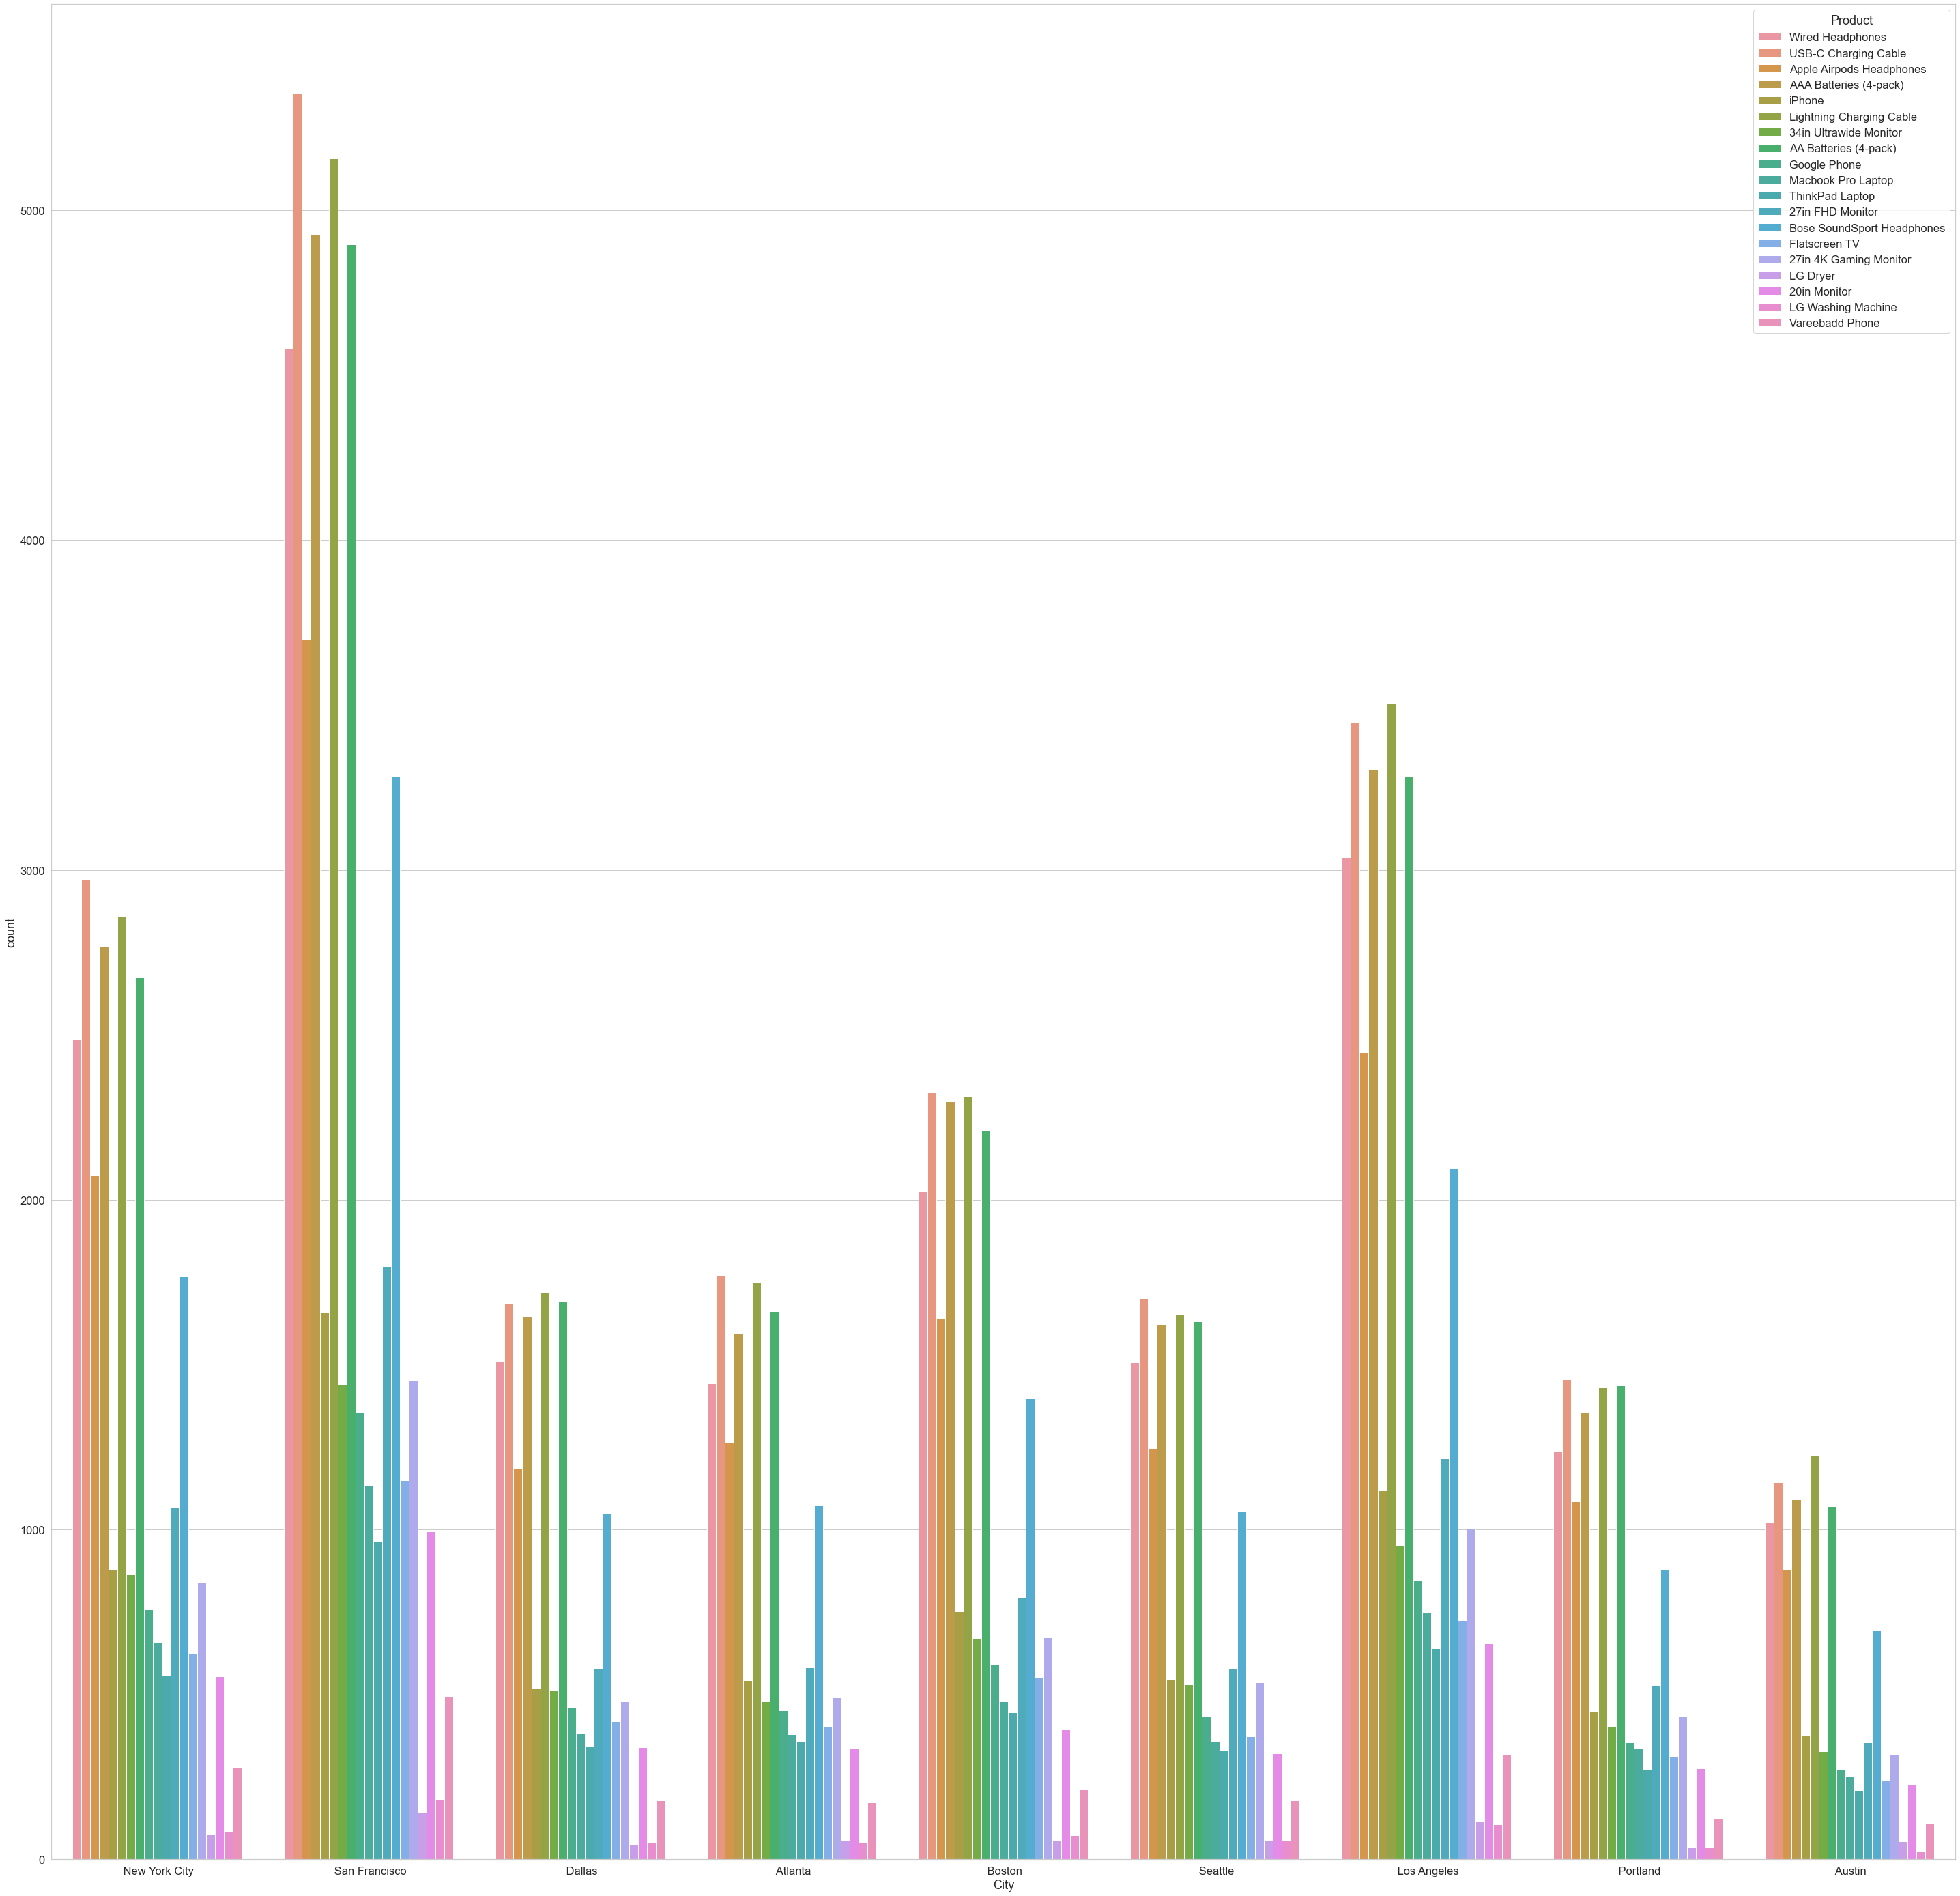

In [269]:
#chart of product vs order quantity
plt.figure(figsize=(50,50))
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5.5})
sns.countplot(x='City', data=df, hue='Product')


### We can see in San Francisco , there are more demand in wired Headphones and USB -C Cables.. So that we can make a branch of that in San Francisco..

In [270]:
#Cnveert the hours to Morning, Afternoon, Evening , Night
df['Day_time'] = df['Hour'].apply(lambda x: 'Morning' if x < 12 else 'Afternoon' if x < 17 else 'Evening' if x < 20 else 'Night')

In [271]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour,Minute,City,Day_time
260741,147268.0,Wired Headphones,1.000000,2.177597,"9 Lake St, New York City, NY 10001",2.161565,2019,1,1,3,7,New York City,Morning
261551,148041.0,USB-C Charging Cable,1.000000,2.175044,"760 Church St, San Francisco, CA 94016",2.159051,2019,1,1,3,40,San Francisco,Morning
8507,149343.0,Apple Airpods Headphones,1.000000,3.865661,"735 5th St, New York City, NY 10001",3.811240,2019,1,1,4,56,New York City,Morning
263558,149964.0,AAA Batteries (4-pack),1.000000,1.032724,"75 Jackson St, Dallas, TX 75001",1.029274,2019,1,1,5,53,Dallas,Morning
262911,149350.0,USB-C Charging Cable,1.414214,2.175044,"943 2nd St, Atlanta, GA 30301",2.660372,2019,1,1,6,3,Atlanta,Morning


In [272]:
#Covert Hour to categorical
df['Day_time'] = df['Day_time'].astype('category')

<AxesSubplot:xlabel='Day_time', ylabel='Sales'>

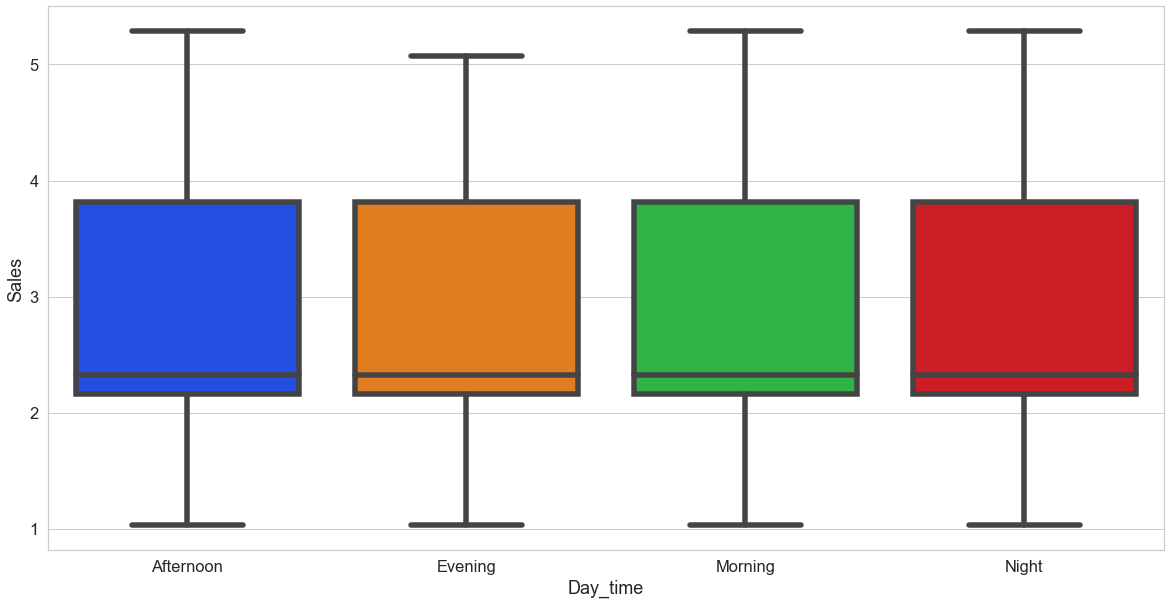

In [273]:
#Distribution of sales by hour ith box plot
plt.figure(figsize=(20,10))
sns.boxplot( y='Sales', data=df, x ='Day_time')

<AxesSubplot:xlabel='Day_time', ylabel='count'>

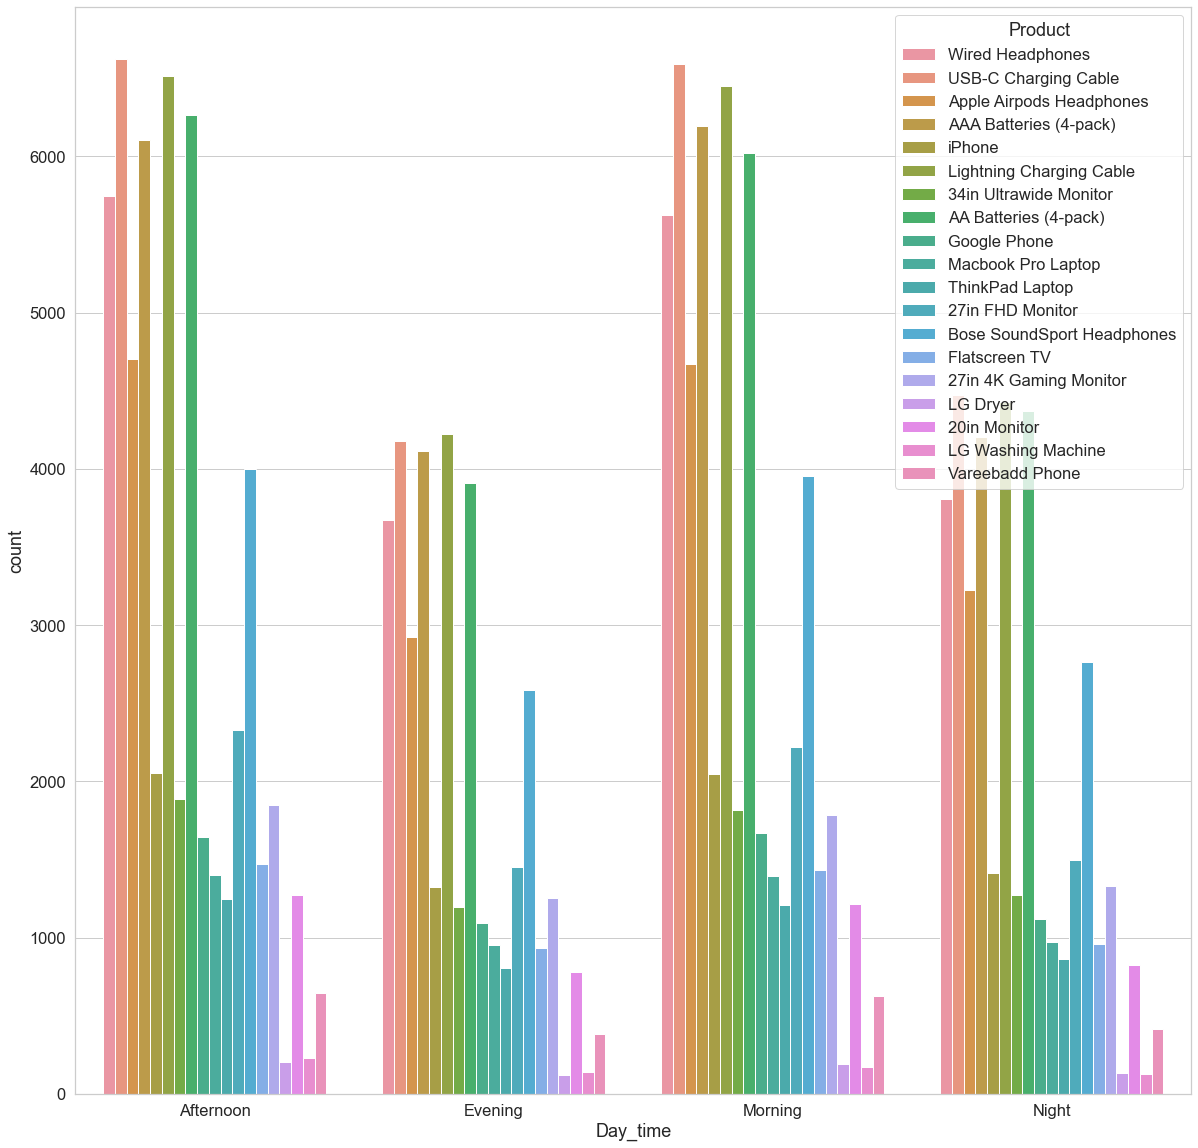

In [274]:
#Distribution of sales by hou
plt.figure(figsize=(20,20))
sns.countplot(x='Day_time', data=df, hue='Product')

### We can see USB-C in is the most selling product in different times in a day..

In [275]:
#group by hour and count the total sales
df5 = df.groupby('Day_time').sum().sort_values(by='Sales', ascending=False)

<AxesSubplot:xlabel='Day_time'>

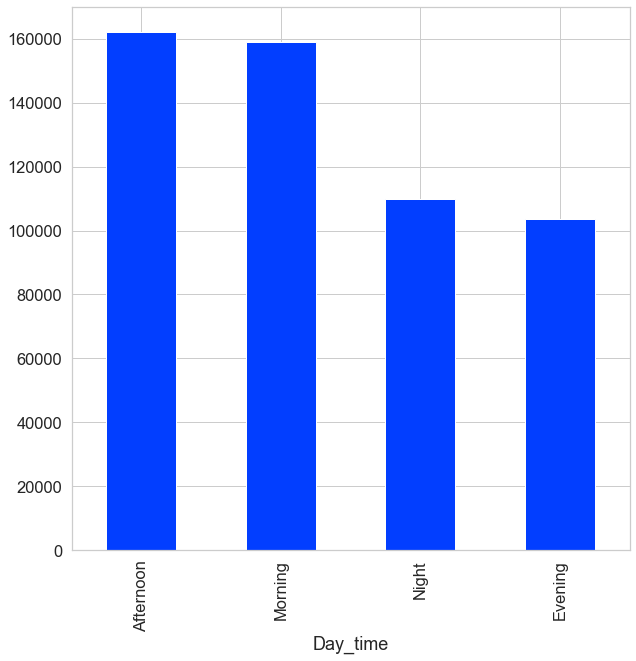

In [276]:
#Plot the total sales
df5['Sales'].plot(kind='bar', figsize=(10,10))

### We can see there are more sales in afternoon in a day..

In [277]:
#Rows where hou is afternoon
df6 = df[df['Day_time'] == 'Afternoon']

In [278]:
df6

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour,Minute,City,Day_time
7186,148072.0,Flatscreen TV,1.000000,4.253459,"989 Center St, San Francisco, CA 94016",4.186305,2019,1,1,12,0,San Francisco,Afternoon
261973,148450.0,iPhone,1.000000,4.689562,"761 Lakeview St, Dallas, TX 75001",4.606073,2019,1,1,12,2,Dallas,Afternoon
261974,148450.0,Lightning Charging Cable,1.000000,2.344128,"761 Lakeview St, Dallas, TX 75001",2.325423,2019,1,1,12,2,Dallas,Afternoon
2576,143674.0,Wired Headphones,1.414214,2.177597,"300 Adams St, Portland, OR 97035",2.662694,2019,1,1,12,6,Portland,Afternoon
5632,146590.0,AA Batteries (4-pack),1.732051,1.251914,"317 Walnut St, New York City, NY 10001",2.131421,2019,1,1,12,9,New York City,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178676,311859.0,20in Monitor,1.000000,3.682415,"771 Dogwood St, San Francisco, CA 94016",3.633460,2019,12,31,16,54,San Francisco,Afternoon
176207,309481.0,Wired Headphones,1.000000,2.177597,"366 Park St, Boston, MA 02215",2.161565,2019,12,31,16,54,Boston,Afternoon
166216,299927.0,20in Monitor,1.000000,3.682415,"143 Chestnut St, Los Angeles, CA 90001",3.633460,2019,12,31,16,55,Los Angeles,Afternoon
232164,309912.0,Wired Headphones,1.000000,2.177597,"809 Pine St, Atlanta, GA 30301",2.161565,2019,12,31,16,58,Atlanta,Afternoon


<AxesSubplot:xlabel='City', ylabel='count'>

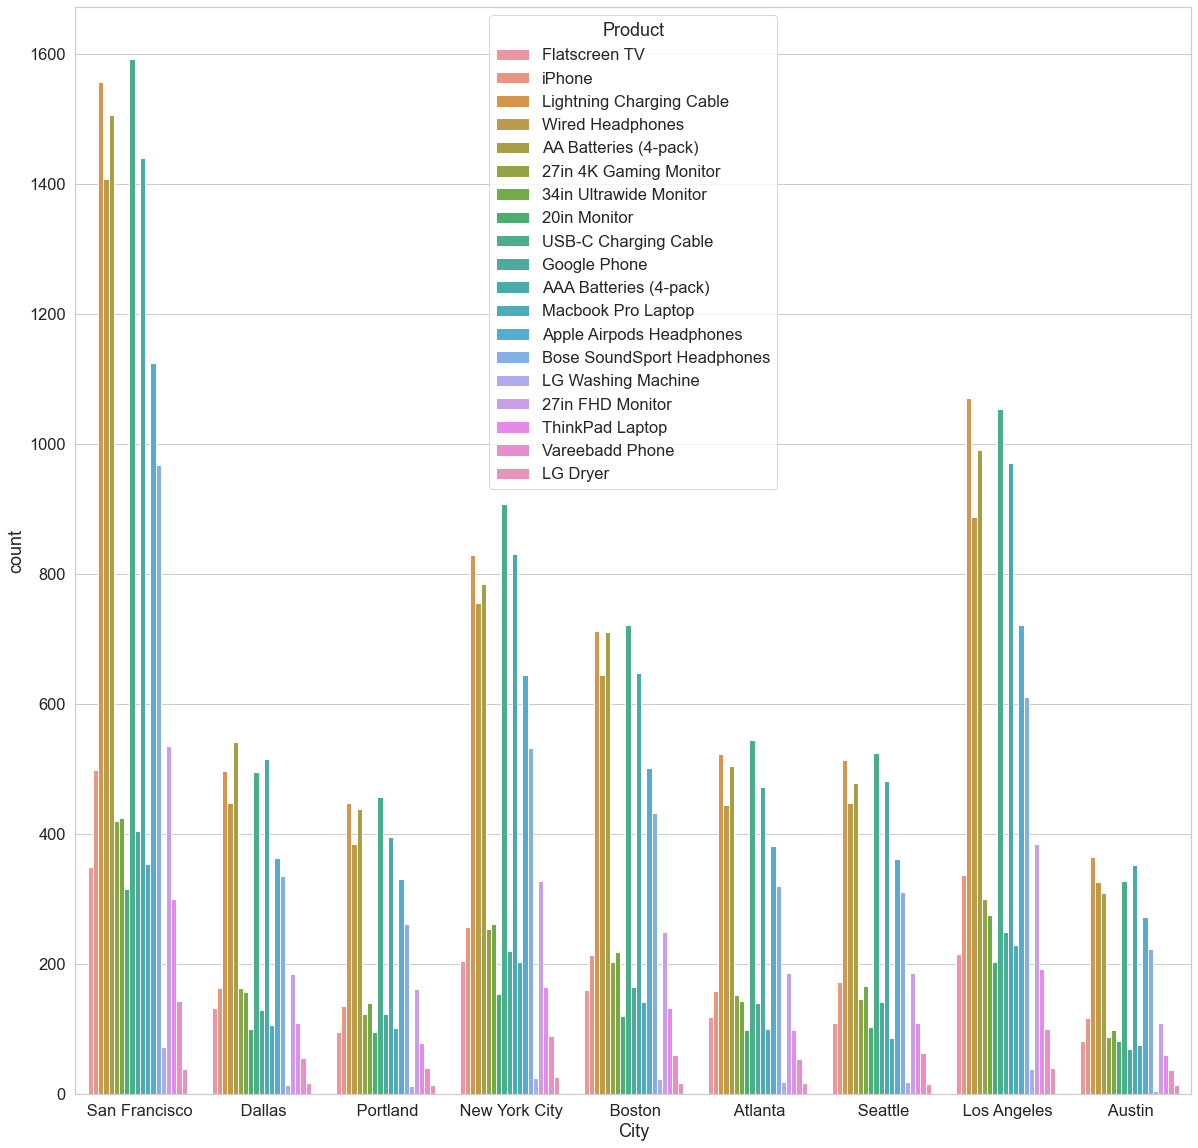

In [279]:
#Sales of products for each city
plt.figure(figsize=(20,20))
sns.countplot(x='City', data=df6, hue='Product')

### So here we can say which product is best for retail stores in diferent cities in afternon..

## Produts which are sold together

In [280]:
#all duplicate rows in purchase address
df.duplicated(subset='Purchase Address').sum()

44899

In [281]:
df7 = df[df['Order ID'].duplicated(keep = False)]
df7.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour,Minute,City,Day_time
3763,144804.0,iPhone,1.0,4.689562,"628 Lake St, New York City, NY 10001",4.606073,2019,1,1,7,29,New York City,Morning
258161,144804.0,Wired Headphones,1.0,2.177597,"628 Lake St, New York City, NY 10001",2.161565,2019,1,1,7,29,New York City,Morning
261586,148074.0,Google Phone,1.0,4.613173,"6 Johnson St, Atlanta, GA 30301",4.532707,2019,1,1,11,25,Atlanta,Morning
7190,148074.0,USB-C Charging Cable,1.0,2.175044,"6 Johnson St, Atlanta, GA 30301",2.159051,2019,1,1,11,25,Atlanta,Morning
261973,148450.0,iPhone,1.0,4.689562,"761 Lakeview St, Dallas, TX 75001",4.606073,2019,1,1,12,2,Dallas,Afternoon


In [282]:
#Cerate a new column and join Product having same order id
df7['Both_Products'] = df7.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\test\AppData\Local\Temp/ipykernel_28156/381841863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Both_Products'] = df7.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [284]:
#Drop duplicate rows in Order ID
df7.drop_duplicates(subset='Order ID', keep='first')

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Sales,Year,Month,Day,Hour,Minute,City,Day_time,Both_Products
3763,144804.0,iPhone,1.0,4.689562,"628 Lake St, New York City, NY 10001",4.606073,2019,1,1,7,29,New York City,Morning,"iPhone,Wired Headphones"
261586,148074.0,Google Phone,1.0,4.613173,"6 Johnson St, Atlanta, GA 30301",4.532707,2019,1,1,11,25,Atlanta,Morning,"Google Phone,USB-C Charging Cable"
261973,148450.0,iPhone,1.0,4.689562,"761 Lakeview St, Dallas, TX 75001",4.606073,2019,1,1,12,2,Dallas,Afternoon,"iPhone,Lightning Charging Cable"
258027,144679.0,USB-C Charging Cable,1.0,2.175044,"984 Lakeview St, San Francisco, CA 94016",2.159051,2019,1,1,12,51,San Francisco,Afternoon,"USB-C Charging Cable,Google Phone"
6538,147451.0,Wired Headphones,1.0,2.177597,"229 Elm St, New York City, NY 10001",2.161565,2019,1,1,12,57,New York City,Afternoon,"Wired Headphones,Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168197,301832.0,AAA Batteries (4-pack),1.0,1.032724,"774 Washington St, San Francisco, CA 94016",1.029274,2019,12,31,20,51,San Francisco,Night,"AAA Batteries (4-pack),20in Monitor"
177820,311036.0,Macbook Pro Laptop,1.0,5.105272,"138 Lincoln St, Los Angeles, CA 90001",5.004054,2019,12,31,22,4,Los Angeles,Night,"Macbook Pro Laptop,AAA Batteries (4-pack)"
178178,311386.0,iPhone,1.0,4.689562,"730 Pine St, San Francisco, CA 94016",4.606073,2020,1,1,0,10,San Francisco,Morning,"iPhone,Apple Airpods Headphones"
163998,297817.0,iPhone,1.0,4.689562,"519 13th St, New York City, NY 10001",4.606073,2020,1,1,0,22,New York City,Morning,"iPhone,Lightning Charging Cable"


In [292]:
#all unique values in both_products
df7.Both_Products.unique()

array(['iPhone,Wired Headphones', 'Google Phone,USB-C Charging Cable',
       'iPhone,Lightning Charging Cable',
       'USB-C Charging Cable,Google Phone',
       'Wired Headphones,Google Phone',
       'Bose SoundSport Headphones,20in Monitor',
       'Apple Airpods Headphones,iPhone',
       'Bose SoundSport Headphones,AA Batteries (4-pack)',
       'USB-C Charging Cable,Wired Headphones',
       'Lightning Charging Cable,iPhone',
       'Vareebadd Phone,USB-C Charging Cable',
       'Apple Airpods Headphones,AA Batteries (4-pack)',
       'Lightning Charging Cable,20in Monitor',
       'iPhone,Apple Airpods Headphones',
       'AA Batteries (4-pack),Bose SoundSport Headphones',
       'AAA Batteries (4-pack),Flatscreen TV', 'Wired Headphones,iPhone',
       'AAA Batteries (4-pack),27in FHD Monitor',
       'Wired Headphones,27in FHD Monitor',
       'AA Batteries (4-pack),27in 4K Gaming Monitor',
       'USB-C Charging Cable,Vareebadd Phone',
       'Apple Airpods Headphones,AAA Ba

<AxesSubplot:xlabel='Both_Products', ylabel='count'>

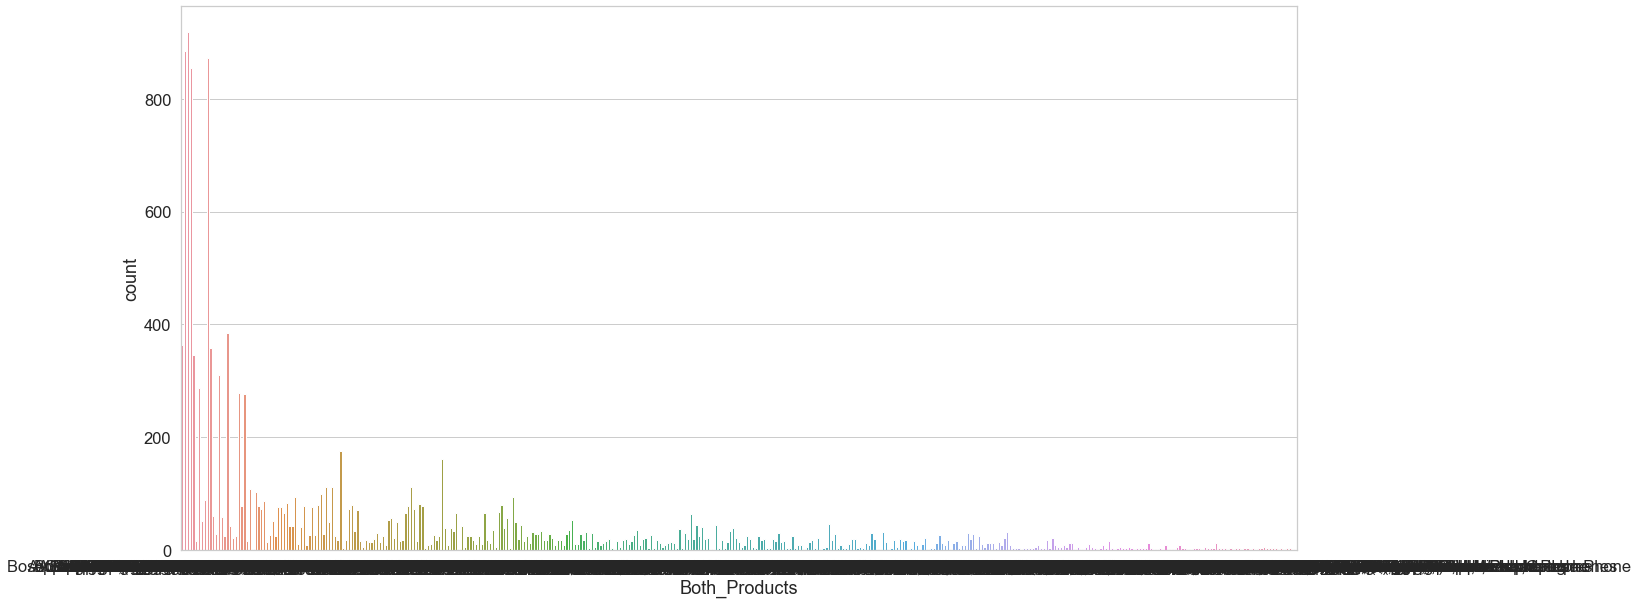

In [293]:
#Count plot dor both_products
plt.figure(figsize=(20,10))
sns.countplot(x='Both_Products', data=df7)